In [1]:
!gdown --id 1onaG42NZft3wCE1WH0GDEbUhu75fedP5

Downloading...
From: https://drive.google.com/uc?id=1onaG42NZft3wCE1WH0GDEbUhu75fedP5
To: /content/horse-or-human.zip
100% 150M/150M [00:00<00:00, 165MB/s]


In [2]:
import os 
import zipfile

In [3]:
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

**Directories with traning human and horse images**

In [4]:
train_horse_dir = os.path.join('./horse-or-human/horses')
train_human_dir = os.path.join('./horse-or-human/humans')


In [5]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])
train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse37-4.png', 'horse43-8.png', 'horse45-1.png', 'horse09-0.png', 'horse42-0.png', 'horse24-1.png', 'horse22-8.png', 'horse23-1.png', 'horse11-9.png', 'horse42-5.png']
['human02-04.png', 'human05-04.png', 'human02-00.png', 'human07-26.png', 'human17-19.png', 'human06-25.png', 'human12-24.png', 'human01-30.png', 'human04-15.png', 'human11-08.png']


In [6]:
print("total training horse images ",len(train_horse_names) )  #total number of horses images in directories
print("total training human images ",len(train_human_names) )  #total number of human images in directories

total training horse images  500
total training human images  527


In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# parameters for our graph || we will output images in 4 by 4 configuration
nrows = 4
ncol = 4

# Index for iterating over images

pic_index = 0

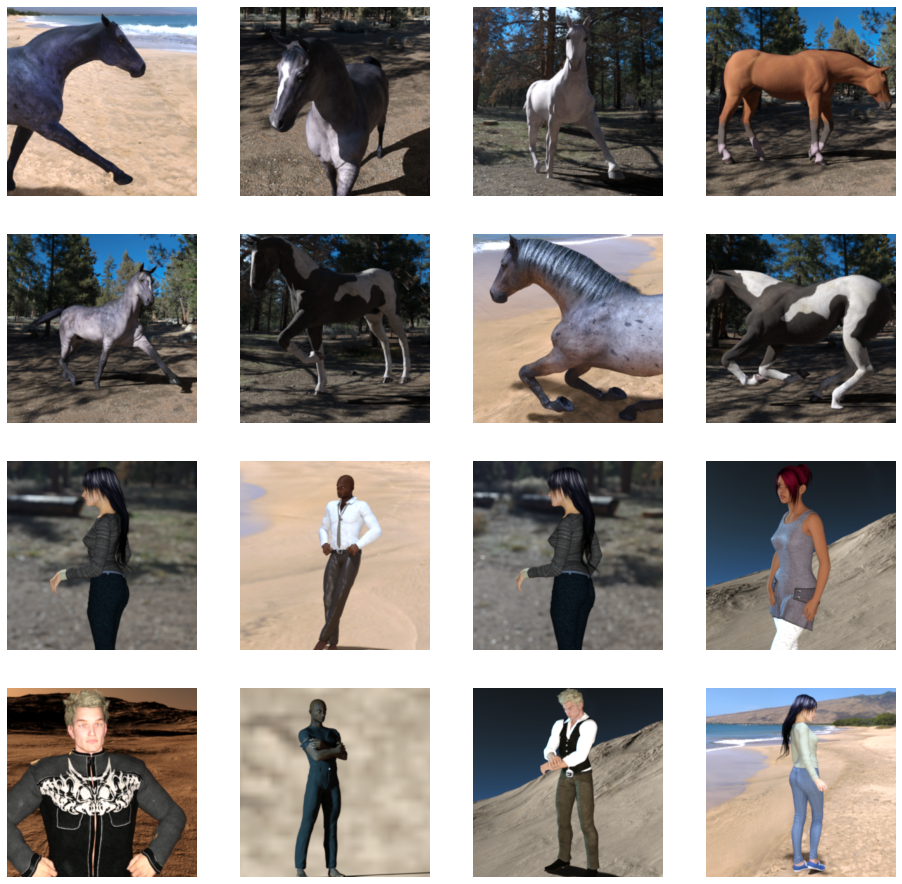

In [8]:
# Set up matplotlib fig, and size it to fit 4x4 pics

fig = plt.gcf()
fig.set_size_inches(ncol*4,nrows*4)
pic_index+=8

next_horse_pix = [os.path.join(train_horse_dir,fname)
                  for fname in train_horse_names[pic_index-8:pic_index]]

next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]  
        
for i ,img_path in enumerate(next_horse_pix + next_human_pix):
  # subplot indices start at 1
  sp = plt.subplot(nrows,ncol,i+1)
  sp.axis('off')    #dont show axis or grid lines
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# **BUILDING MODEL FROM SCRATCH**

In [9]:
import tensorflow as tf

In [10]:
model = tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(16, (3,3) , activation='relu', input_shape = (300,300,3)),
          tf.keras.layers.MaxPooling2D(2,2),

          # there will be total 4 convolution layers
          tf.keras.layers.Conv2D(32, (3,3) , activation='relu'),
          tf.keras.layers.MaxPooling2D(2,2),

          tf.keras.layers.Conv2D(64, (3,3) , activation='relu'),
          tf.keras.layers.MaxPooling2D(2,2),

          tf.keras.layers.Conv2D(64, (3,3) , activation='relu'),
          tf.keras.layers.MaxPooling2D(2,2),

          tf.keras.layers.Conv2D(64, (3,3) , activation='relu'),
          tf.keras.layers.MaxPooling2D(2,2),

          # Flatten the result to feed into a DNN
          tf.keras.layers.Flatten(),

          # 512 neurons hidden layers 
          tf.keras.layers.Dense(512, activation = 'relu'),

          # only one output neuron which will contain a value from 0-1 where 0 for 1 class ('horses') and one for other('humans')
          tf.keras.layers.Dense(1, activation = 'sigmoid')

])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

NOTE: In this case, using the RMSprop optimization algorithm is preferable to stochastic gradient descent (SGD), because RMSprop automates learning-rate tuning for us. (Other optimizers, such as Adam and Adagrad, also automatically adapt the learning rate during training, and would work equally well here.)

In [12]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer = RMSprop(learning_rate = 0.001),
              metrics = ['accuracy'])

# Data Preprocessing

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)

# flow training images in batches of 128 using train_data generator

train_generator = train_datagen.flow_from_directory(
    './horse-or-human/',
    target_size = (300,300),        #All images will be resized to 150,150
    batch_size = 128,

    # Since we use binary_crossentropy loss, we need binary labels
    class_mode= 'binary')


Found 1027 images belonging to 2 classes.


# Training
Let's train for 15 epochs

In [14]:
history = model.fit(
    train_generator,
    steps_per_epoch = 8,
    epochs = 15,
    verbose = 1
)

Epoch 1/15
8/8 [==============================] - 19s 750ms/step - loss: 1.0281 - accuracy: 0.5373
Epoch 2/15
8/8 [==============================] - 7s 813ms/step - loss: 0.7062 - accuracy: 0.6885
Epoch 3/15
8/8 [==============================] - 7s 770ms/step - loss: 0.5072 - accuracy: 0.7586
Epoch 4/15
8/8 [==============================] - 7s 775ms/step - loss: 0.6177 - accuracy: 0.7653
Epoch 5/15
8/8 [==============================] - 7s 813ms/step - loss: 0.9065 - accuracy: 0.7397
Epoch 6/15
8/8 [==============================] - 7s 947ms/step - loss: 0.2517 - accuracy: 0.8999
Epoch 7/15
8/8 [==============================] - 7s 817ms/step - loss: 0.1329 - accuracy: 0.9499
Epoch 8/15
8/8 [==============================] - 7s 810ms/step - loss: 0.5667 - accuracy: 0.8598
Epoch 9/15
8/8 [==============================] - 7s 813ms/step - loss: 0.1256 - accuracy: 0.9611
Epoch 10/15
8/8 [==============================] - 7s 814ms/step - loss: 0.0754 - accuracy: 0.9711
Epoch 11/15
8/8 [=

# Manual Testing with external pictures

Saving horse-2063672_640.jpg to horse-2063672_640 (7).jpg
[0.]
horse-2063672_640.jpg is a horse


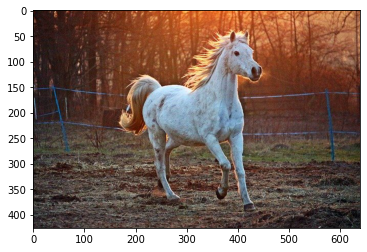

In [37]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  plt.imshow(mpimg.imread(path))
  
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

  

In [30]:
# import numpy as np
# from keras.preprocessing import image
# import os

# image = os.listdir("/tmp/images")
# print(image)

# for i in image:
#   print()
#   # predicting images
#   path = "/tmp/images/" + i
#   img = image.load_img(path, target_size=(300, 300))
#   x = image.img_to_array(img)
#   x = np.expand_dims(x,axis=0)
#   images = np.vstack([x])
#   classes = model.predict(images,batch_size=10)
#   print(classes[0])
#   if(classes[0]>0.5):
#     print(" human")
#   else:
#     print(" human")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


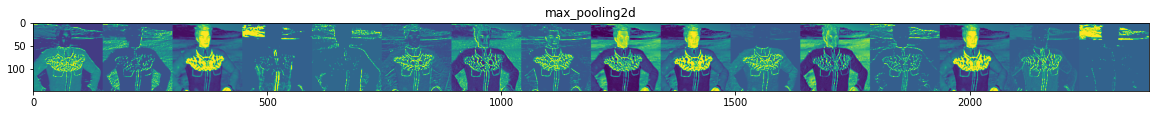

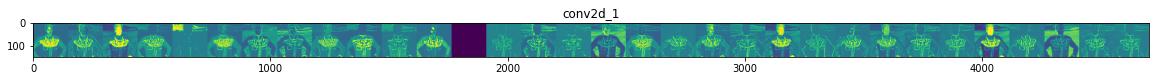

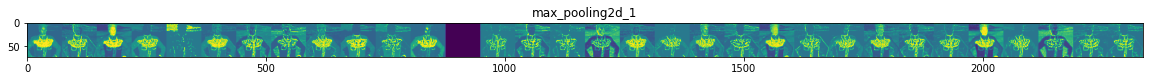

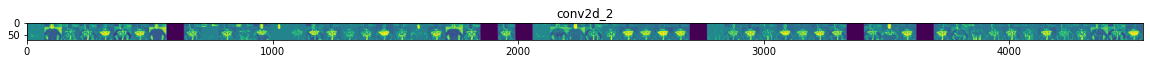

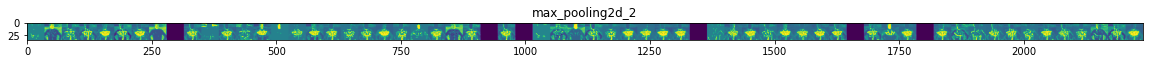

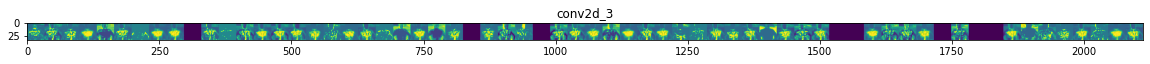

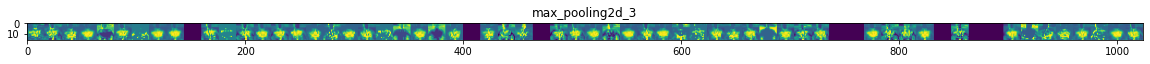

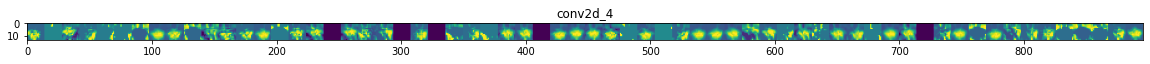

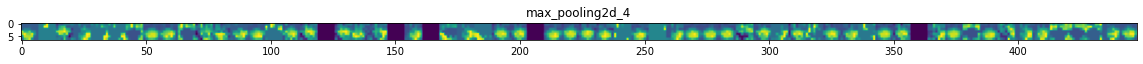

In [38]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

# Same Procedure but now validation data also included 

In [39]:
!gdown --id 1onaG42NZft3wCE1WH0GDEbUhu75fedP5
!gdown --id 1LYeusSEIiZQpwN-mthh5nKdA75VsKG1U

Downloading...
From: https://drive.google.com/uc?id=1onaG42NZft3wCE1WH0GDEbUhu75fedP5
To: /content/horse-or-human.zip
100% 150M/150M [00:00<00:00, 150MB/s]
Downloading...
From: https://drive.google.com/uc?id=1LYeusSEIiZQpwN-mthh5nKdA75VsKG1U
To: /content/validation-horse-or-human.zip
100% 11.5M/11.5M [00:00<00:00, 165MB/s]


In [40]:
import os
import zipfile

local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')

local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./validation-horse-or-human')

zip_ref.close()

In [41]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join('./validation-horse-or-human/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('./validation-horse-or-human/humans')

In [42]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

validation_horse_hames = os.listdir(validation_horse_dir)
print(validation_horse_hames[:10])

validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])

['horse37-4.png', 'horse43-8.png', 'horse45-1.png', 'horse09-0.png', 'horse42-0.png', 'horse24-1.png', 'horse22-8.png', 'horse23-1.png', 'horse11-9.png', 'horse42-5.png']
['human02-04.png', 'human05-04.png', 'human02-00.png', 'human07-26.png', 'human17-19.png', 'human06-25.png', 'human12-24.png', 'human01-30.png', 'human04-15.png', 'human11-08.png']
['horse5-100.png', 'horse3-484.png', 'horse5-164.png', 'horse3-141.png', 'horse3-070.png', 'horse5-018.png', 'horse4-403.png', 'horse1-510.png', 'horse2-544.png', 'horse1-539.png']
['valhuman01-02.png', 'valhuman02-11.png', 'valhuman02-19.png', 'valhuman05-20.png', 'valhuman01-00.png', 'valhuman03-24.png', 'valhuman03-00.png', 'valhuman04-12.png', 'valhuman02-24.png', 'valhuman04-10.png']


In [43]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


In [44]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

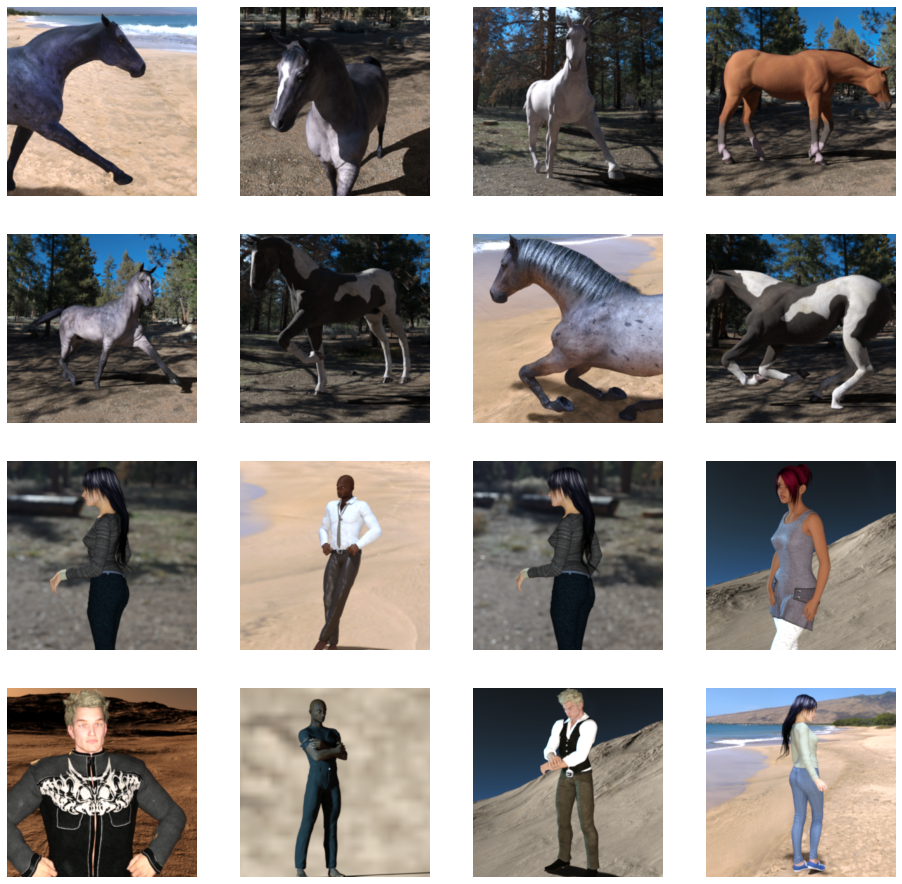

In [45]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [46]:
import tensorflow as tf

In [47]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [48]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 149, 149, 16)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 35, 35, 64)      

In [49]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [50]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        './validation-horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [51]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 11s 1s/step - loss: 0.8666 - accuracy: 0.5228 - val_loss: 0.7066 - val_accuracy: 0.5078
Epoch 2/15
8/8 [==============================] - 8s 1s/step - loss: 0.8598 - accuracy: 0.6585 - val_loss: 0.9104 - val_accuracy: 0.5156
Epoch 3/15
8/8 [==============================] - 9s 1s/step - loss: 0.7173 - accuracy: 0.6107 - val_loss: 0.6149 - val_accuracy: 0.8672
Epoch 4/15
8/8 [==============================] - 9s 1s/step - loss: 0.5557 - accuracy: 0.8298 - val_loss: 4.6636 - val_accuracy: 0.5000
Epoch 5/15
8/8 [==============================] - 8s 997ms/step - loss: 0.6120 - accuracy: 0.8165 - val_loss: 0.8761 - val_accuracy: 0.7578
Epoch 6/15
8/8 [==============================] - 8s 1s/step - loss: 0.2199 - accuracy: 0.9188 - val_loss: 1.4896 - val_accuracy: 0.6328
Epoch 7/15
8/8 [==============================] - 8s 991ms/step - loss: 0.7483 - accuracy: 0.7898 - val_loss: 2.2007 - val_accuracy: 0.6172
Epoch 8/15
8/8 [==================

In [52]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving horse-2063672_640.jpg to horse-2063672_640 (8).jpg
[0.]
horse-2063672_640.jpg is a horse


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


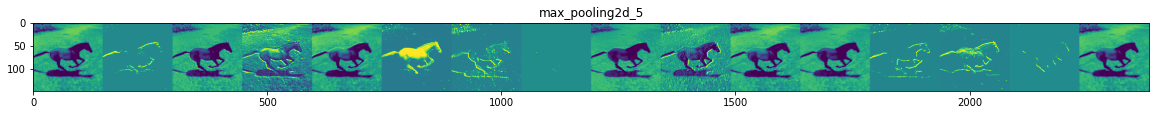

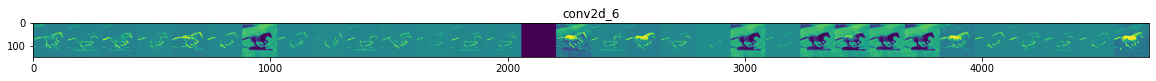

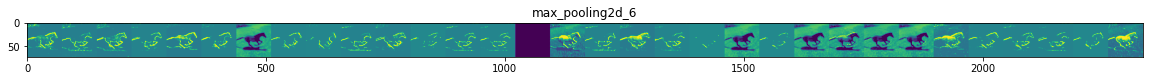

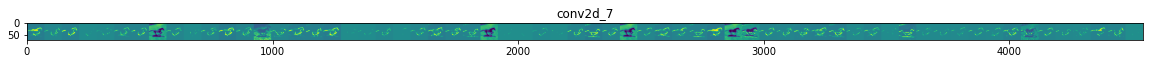

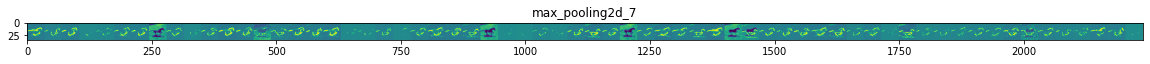

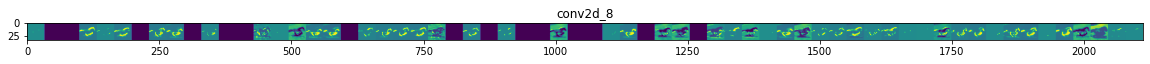

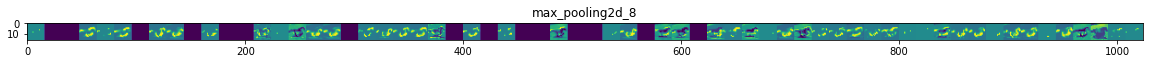

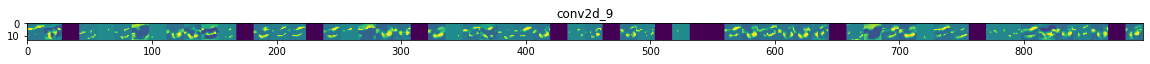

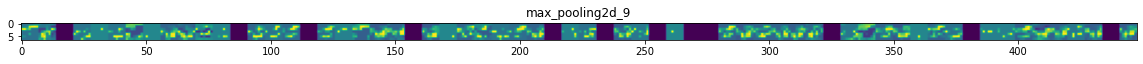

In [53]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')